In [103]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [104]:
place = "University of Canterbury"
network = ox.graph_from_place(place)

In [105]:
nodes, edges = ox.graph_to_gdfs(network)

In [106]:
ernest_rutherford = gpd.GeoDataFrame(
  {'Address': ['Ernest Rutheford']},
  geometry=[Point(172.5824, -43.5225)],
  crs='EPSG:4326'
)

print(ernest_rutherford)

            Address                   geometry
0  Ernest Rutheford  POINT (172.5824 -43.5225)


<Axes: >

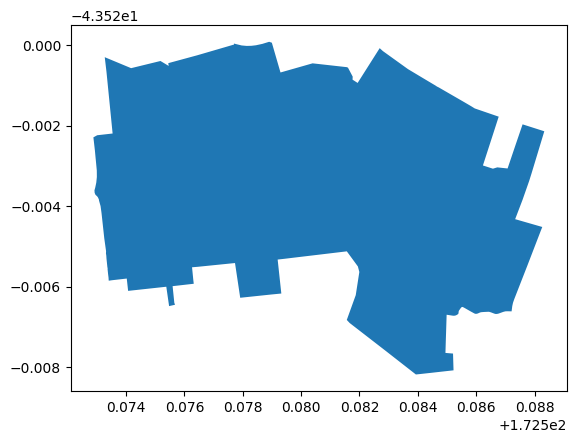

In [107]:
uni_area = ox.geocode_to_gdf(place)

uni_area.plot()

In [108]:
amenities = ['cafe', 'fast_food', 'food_court', 'restaurant']

eatery = ox.features_from_place(place, tags={'amenity': amenities})

In [109]:
eatery

geometry     amenity diet:vegan  \
element id                                                                
node    4149989089   POINT (172.58322 -43.52381)        cafe        yes   
        4694328547   POINT (172.57374 -43.52536)  restaurant        NaN   
        4863444135    POINT (172.5829 -43.52356)  restaurant        NaN   
        4863450313   POINT (172.58287 -43.52359)  restaurant        NaN   
        4863450315   POINT (172.58283 -43.52363)  restaurant        NaN   
        5793355993    POINT (172.5832 -43.52237)        cafe        NaN   
        6515711811   POINT (172.58364 -43.52145)        cafe        yes   
        6853547716   POINT (172.58435 -43.52334)        cafe        NaN   
        9414933105   POINT (172.58264 -43.52347)  restaurant         no   
        9414933106    POINT (172.5826 -43.52353)        cafe        NaN   
        10964806120    POINT (172.5846 -43.5251)        cafe        NaN   

                    diet:vegetarian indoor_seating level              name  \
element id                                                                   
node    4149989089              yes            yes     0         Cafe 1894   
        4694328547              NaN            NaN   NaN  Shirleys Kitchen   
        4863444135              NaN            yes     0         Burgatory   
        4863450313              NaN            yes     0       Umami Spice   
        4863450315              NaN            yes     0         El Kiosco   
        5793355993              NaN            yes     0         Ancestral   
        6515711811              yes            yes   NaN      Nuts & Bolts   
        6853547716              NaN            NaN     0      Therapy Cafe   
        9414933105              yes            yes     0            Oishii   
        9414933106              NaN            yes     0              Otto   
        10964806120             NaN            yes   NaN          Mix Cafe   

                                         opening_hours outdoor_seating  \
element id                                                               
node    4149989089                   Mo-Fr 08:00-16:00             yes   
        4694328547   Mo-Fr 10:00-20:00; Sa 11:00-20:00             NaN   
        4863444135                   Mo-Fr 11:00-15:30             yes   
        4863450313                   Mo-Fr 11:00-15:30             yes   
        4863450315                   Mo-Fr 11:00-15:30             yes   
        5793355993                   Mo-Fr 09:00-16:00             yes   
        6515711811                   Mo-Fr 09:00-14:30              no   
        6853547716                                 NaN             NaN   
        9414933105                   Mo-Fr 10:00-16:00             yes   
        9414933106                   Mo-Fr 09:00-19:00             yes   
        10964806120                                NaN             yes   

                    smoking  ... addr:country          addr:housename  \
element id                   ...                                        
node    4149989089       no  ...          NaN                     NaN   
        4694328547      NaN  ...           NZ  Ilam Apartments, Hinau   
        4863444135       no  ...          NaN                     NaN   
        4863450313       no  ...          NaN                     NaN   
        4863450315       no  ...          NaN                     NaN   
        5793355993      NaN  ...          NaN                     NaN   
        6515711811       no  ...          NaN                     NaN   
        6853547716       no  ...          NaN                     NaN   
        9414933105      NaN  ...          NaN                     NaN   
        9414933106       no  ...          NaN                     NaN   
        10964806120     NaN  ...          NaN                     NaN   

                    addr:housenumber addr:postcode    addr:street  \
element id                                                         

In [110]:
len(eatery)

11

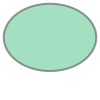

In [111]:
radius_500 = ernest_rutherford.to_crs(epsg=2193).buffer(500).to_crs(epsg=4326)

radius_500.iloc[0]

In [112]:
eatery_polygon = ox.features_from_polygon(radius_500.iloc[0], tags={'amenity': amenities})

In [113]:
buildings = ox.features_from_place(place, tags={'building': True})

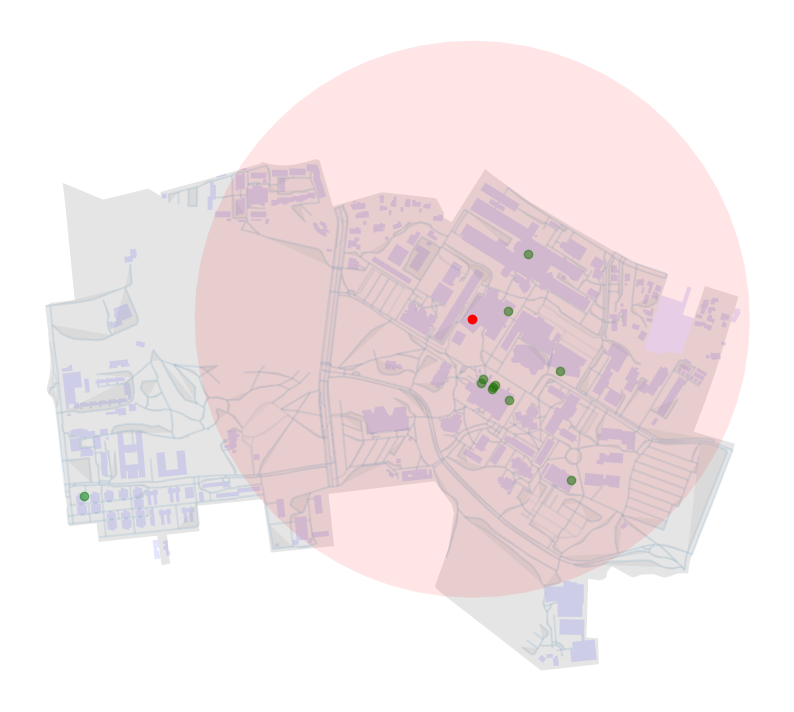

In [114]:
fig, eixo = plt.subplots(figsize=(10, 10))

uni_area.plot(ax = eixo, facecolor='black', alpha=0.1)
edges.plot(ax = eixo, facecolor='gray', alpha=0.05)
buildings.plot(ax = eixo, facecolor='blue', alpha=0.1)
ernest_rutherford.plot(ax=eixo, facecolor='red')
eatery.plot(ax=eixo, facecolor='green', alpha=0.5)
radius_500.plot(ax=eixo, facecolor='red', alpha=0.1)
eixo.set_axis_off()

In [115]:
accessible_area = gpd.GeoDataFrame(geometry=radius_500, crs=eatery.crs)

In [116]:
accessible_eatery = gpd.overlay(eatery, accessible_area, how='intersection', keep_geom_type='False')

len(accessible_eatery)

10

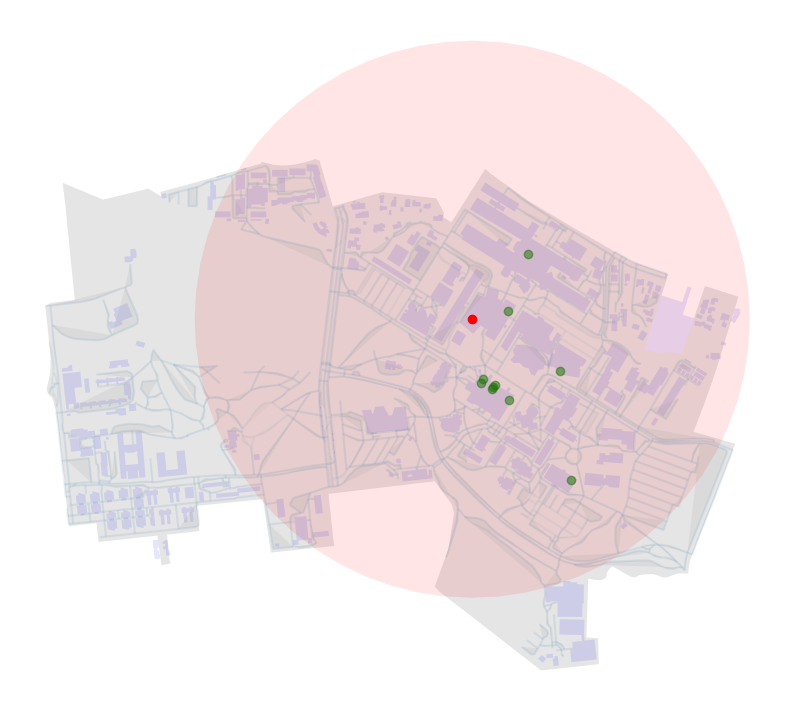

In [117]:
fig, eixo = plt.subplots(figsize=(10, 10))

uni_area.plot(ax = eixo, facecolor='black', alpha=0.1)

edges.plot(ax = eixo, facecolor='gray', alpha=0.05)

buildings.plot(ax = eixo, facecolor='blue', alpha=0.1)

ernest_rutherford.plot(ax=eixo, facecolor='red')

accessible_eatery.plot(ax=eixo, facecolor='green', alpha=0.5)

radius_500.plot(ax=eixo, facecolor='red', alpha=0.1)

eixo.set_axis_off()

In [118]:
accessible_eatery.to_crs(epsg=2193, inplace=True)
ernest_rutherford.to_crs(epsg=2193, inplace=True)

In [119]:
accessible_eatery['distance'] = accessible_eatery.geometry.distance(ernest_rutherford.geometry.iloc[0]).round(2)

In [120]:
accessible_eatery.sort_values('distance', ascending=True).reset_index()[['name', 'amenity', 'distance']]

,name,amenity,distance
0,Ancestral,cafe,66.07
1,Oishii,restaurant,109.21
2,Otto,cafe,115.04
3,Burgatory,restaurant,124.28
4,Umami Spice,restaurant,127.28
5,El Kiosco,restaurant,130.45
6,Nuts & Bolts,cafe,153.89
7,Cafe 1894,cafe,159.80
8,Therapy Cafe,cafe,183.19
9,Mix Cafe,cafe,339.12
